In [10]:
from pandas import  read_csv, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from plotly import graph_objs, figure_factory
from pandas import  read_csv, get_dummies, DataFrame, Series, to_datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn import tree
from sklearn import metrics
from imblearn.pipeline import Pipeline


# reading and metadata
data1 = read_csv("ParisHousing.csv")
print(data1.head())
print(data1.shape)
print(data1.info())
print(data1.describe())

#  Heatmap
correlation  = data1.corr()
f = figure_factory.create_annotated_heatmap(correlation.values,list(correlation.columns),list(correlation.columns),correlation.round(2).values,showscale=False)
f.show()


# Dividing dataset into label and feature sets
X = data1.drop(['price'], axis = 1) # Features
Y = data1['price'] # Labels
print(X.shape)
print(Y.shape)

# data Scaling 
X_ = StandardScaler().fit_transform(X)

   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1     

(10000, 16)
(10000,)


In [3]:
#  Linear Regression
LinearRegression2 = linear_model.SGDRegressor(random_state = 1, penalty = 'elasticnet')
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100], 'l1_ratio': [0,0.25,0.5,0.75,1]}

grid_search2 = GridSearchCV(estimator=LinearRegression2, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(X_, Y)


best_parameters = grid_search2.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search2.best_score_ 
print("Best result: ", best_result)
best_model = grid_search2.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))
# Modified mean square error
r, c=X_.shape
print(4/5*r,c) # 4/5*r is number of rows in training set, c is number of columns
modified_r2 = 1-(1-best_result)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2: ", modified_r2)

Best parameters:  {'alpha': 10, 'eta0': 0.0001, 'l1_ratio': 1, 'max_iter': 10000}
Best result:  0.9999995642185576
Intercept β0:  [4993443.93261173]
             Features  Coefficients
0        squareMeters  2.877282e+06
4              floors  1.566179e+03
2             hasYard  1.495398e+03
3             hasPool  1.478933e+03
6       cityPartRange  1.262130e+02
9          isNewBuilt  6.726888e+01
10  hasStormProtector  6.114587e+01
1       numberOfRooms  0.000000e+00
7       numPrevOwners  0.000000e+00
11           basement  0.000000e+00
13             garage  0.000000e+00
14     hasStorageRoom  0.000000e+00
12              attic -2.744854e+00
15       hasGuestRoom -8.043714e+00
8                made -1.175430e+01
5            cityCode -1.314522e+01
8000.0 16
modified_r2:  0.9999995633451387


In [4]:
#Support Vector Regression
SVRegressor = SVR()
Hparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [100,1000,10000], 'epsilon': [100,1000,10000]}
grid_search1 = GridSearchCV(estimator=SVRegressor, param_grid=Hparameters, scoring='r2', cv=5)
grid_search1.fit(X_, Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search1.best_score_ 
print("Best result: ", best_result)
modified_r2 = 1-(1-best_result)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2: ", modified_r2)

Best parameters:  {'C': 10000, 'epsilon': 100, 'kernel': 'linear'}
Best result:  0.9999995631097247
modified_r2:  0.9999995622340834


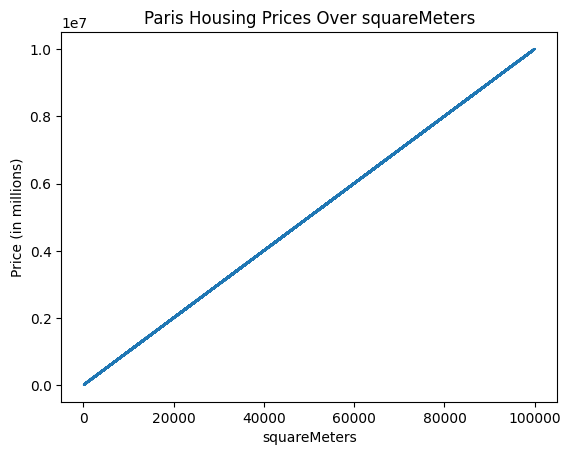

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('ParisHousing.csv')

# Extract the squareMeters and price columns
squareMeters = data['squareMeters']
price = data['price']

# Create the line graph
plt.plot(squareMeters, price)
plt.title('Paris Housing Prices Over squareMeters')
plt.xlabel('squareMeters')
plt.ylabel('Price (in millions)')
plt.show()


<ipython-input-41-9c4feb2eb131>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




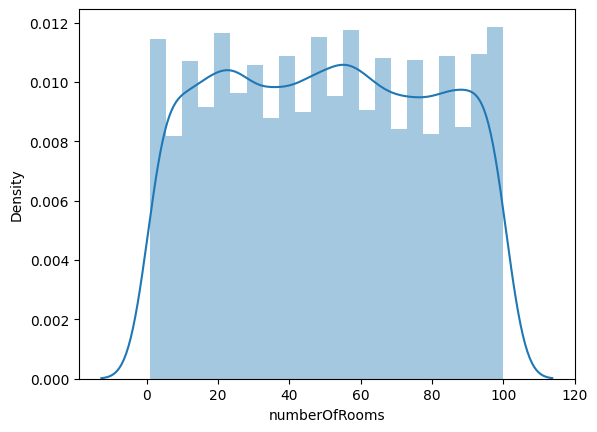

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
sns.distplot(data1['numberOfRooms'])
plt.show()

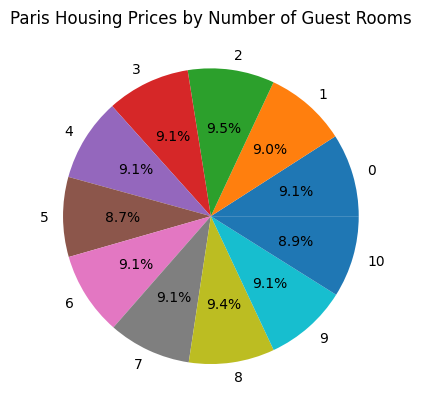

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv('ParisHousing.csv')

# Group the data by number of guest rooms
grouped_data = data.groupby('hasGuestRoom')['price'].sum()

# Create the pie chart
labels = grouped_data.index
values = grouped_data.values
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Paris Housing Prices by Number of Guest Rooms')
plt.show()
